# Lab 2 - Exploring and manipulating data. 
Here is what we we do:
1. Read in the data from a CSV file and do simple visualizations
2. Look for patterns in the data
3. Deal with missing values
4. Add in new features
5. Split and graph

In [ ]:
# imports

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

### Read the CSV file:
We will use info() on the data frame to get a first look.  This is mostly a quick sanity check

In [ ]:
# Load Howell.csv from the same folder as this file
# data_path: Path = Path(__file__).parent / "Howell.csv"
data_path = Path.cwd() / "Howell.csv"
howell_full: pd.DataFrame = pd.read_csv("Howell.csv", sep=";")

In [ ]:
# Displaying basic information on the dataset:
howell_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


In [ ]:
# Checking for empty values
howell_full.isnull().sum()

height    0
weight    0
age       0
male      0
dtype: int64

In [ ]:
# Displaying the head of the data
print(howell_full.head(n=10))

# displaying basic summary statistics
print(howell_full.describe())

# checking for correlations
howell_full.corr()

    height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0
5  163.830  62.992589  35.0     1
6  149.225  38.243476  32.0     0
7  168.910  55.479971  27.0     1
8  147.955  34.869885  19.0     0
9  165.100  54.487739  54.0     1
           height      weight         age        male
count  544.000000  544.000000  544.000000  544.000000
mean   138.263596   35.610618   29.344393    0.472426
std     27.602448   14.719178   20.746888    0.499699
min     53.975000    4.252425    0.000000    0.000000
25%    125.095000   22.007717   12.000000    0.000000
50%    148.590000   40.057844   27.000000    0.000000
75%    157.480000   47.209005   43.000000    1.000000
max    179.070000   62.992589   88.000000    1.000000


,height,weight,age,male
height,1.000000,0.940822,0.683689,0.139229
weight,0.940822,1.000000,0.678335,0.155443
age,0.683689,0.678335,1.000000,0.005887
male,0.139229,0.155443,0.005887,1.000000


Reflection 1:
1) How many data instances are there?
   1) There are 544 instances
2) How many features are there?
   1) There are 4 features
3) What are the names?
   1) The feature's names are height, weight, age, and male.
4) Are there any missing values?
   1) No, all records have values
5) Are there any non-numeric features?
   1) No, all features are numeric/binary.
6) Are the data instances sorted on any of the attributes?
   1) The data instances do not look sorted.
7) What are the units of height?
   1) I would assume centimeters.
8) What are the units of weight?
   1) I would assume kilograms.
9)  What are the minimum, median and max age?
    1)  min - 0
    2)  med - 27.0
    3)  max - 88.0
10) What two different features have the highest correlation?
    1)  Height and Weight

### Quick look at distributions:

array([[<Axes: xlabel='height', ylabel='height'>,
        <Axes: xlabel='weight', ylabel='height'>,
        <Axes: xlabel='age', ylabel='height'>],
       [<Axes: xlabel='height', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='age', ylabel='weight'>],
       [<Axes: xlabel='height', ylabel='age'>,
        <Axes: xlabel='weight', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>]], dtype=object)

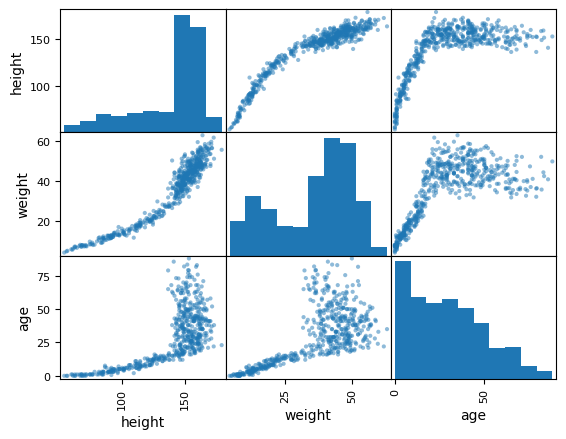

In [ ]:
# Creating a scatter matrix

attributes = ["height", "weight", "age"]
scatter_matrix(howell_full[attributes])

11) Describe each distribution as skew, uniform, bimodal, or gaussian. (I'm calling them 1-9)
    1)  Skew
    2)  Skew
    3)  Skew
    4)  Skew
    5)  Bimodal
    6)  Skew
    7)  Skew
    8)  Skew
    9)  Skew
12) Look at the age-weight scatter plot and explain the character of the graph.
    1)  it looks like most people have an extremely similar developmental growth track, but once they hit the age around 25 (post-grad years), people's weights start to fluctuate. This could be because of disease, injury, or lack of exercise.
13) What does the age histogram tell us about this group of people? 
    1)  It tells us these people are all varying in age and weight, even if we all started in similar spaces with development.
14) How does the age histogram compare with that of people living in modern times?
    1)  People in this data set seemed to have died earlier than people in modern times. The age tapers off, but I know a ton of people in their 50's, and it doesn't seem like there are that many people around in their 50's in this set.

### Quick Visualization

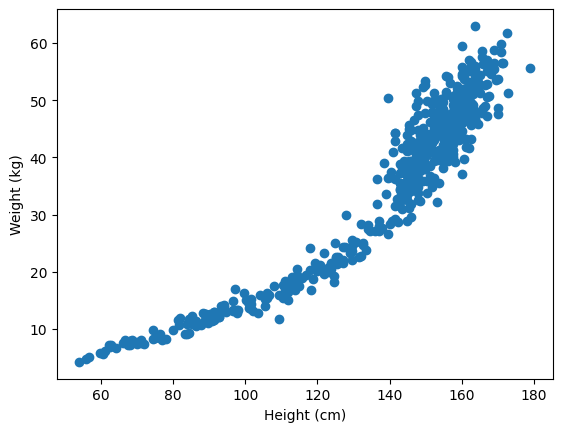

In [ ]:
height = howell_full["height"]
weight = howell_full["weight"]
plt.scatter(height, weight)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

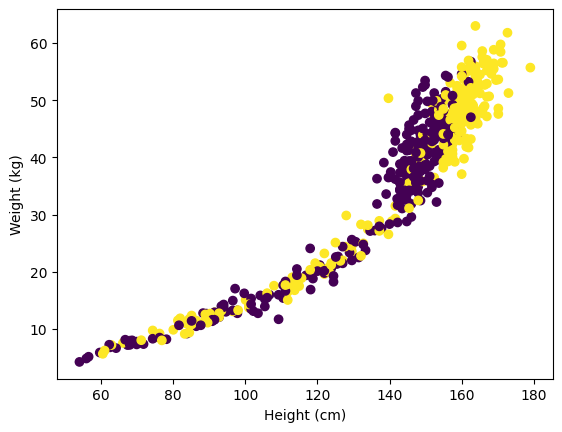

In [ ]:
gender = howell_full["male"]
plt.scatter(height, weight, c=gender)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

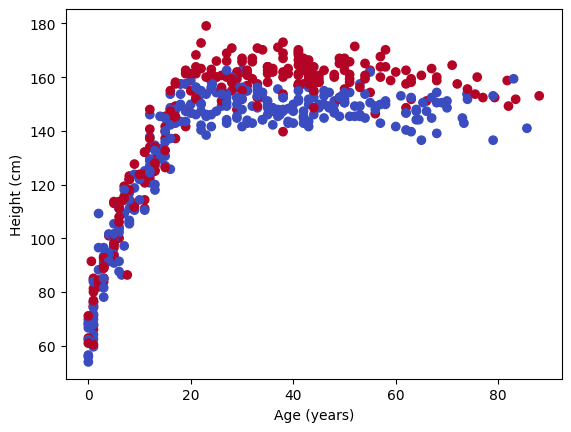

In [ ]:
gender = howell_full["male"]
plt.scatter(howell_full["age"], howell_full["height"], c=gender, cmap="coolwarm")
plt.xlabel("Age (years)")
plt.ylabel("Height (cm)")
plt.show()

### Handling Missing Data
In our case we have no missing data, so the code here is just for reference.

In [ ]:
# create a new feature with the name new
howell_full["new"] = howell_full["male"] + howell_full["age"]
howell_full.info()

# get rid of the new feature
howell_full.drop(axis="columns", labels="new", inplace=True)
howell_full.info()

# remove rows that are missing values
howell_full.dropna(axis="index", how="any", inplace=True)

height_median = howell_full["height"].median()
weight_average = howell_full["weight"].mean()

# replace missing values by median or average (or any arbitrary value)
howell_full["height"].fillna(height_median, inplace=True)
howell_full["weight"].fillna(weight_average, inplace=True)
howell_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
 4   new     544 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 21.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    fl

C:\Users\karli\AppData\Local\Temp\ipykernel_12896\2621319004.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  howell_full["height"].fillna(height_median, inplace=True)
C:\Users\karli\AppData\Local\Temp\ipykernel_12896\2621319004.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

### Adding a New Feature BMI

In [ ]:
# Compute bmi based on height and weight metric units
def bmi(height, weight):
    return 10000 * weight / (height**2)


print(bmi(150, 40))
new_feature = bmi(howell_full["height"], howell_full["weight"])
print(new_feature)
howell_full["bmi"] = new_feature
howell_full.head(n=10)

17.77777777777778
0      20.764297
1      18.695244
2      17.095718
3      21.561444
4      19.520384
         ...    
539    14.720729
540    19.739486
541    22.155341
542    15.917698
543    20.844590
Length: 544, dtype: float64


,height,weight,age,male,bmi
0,151.765,47.825606,63.0,1,20.764297
1,139.700,36.485807,63.0,0,18.695244
2,136.525,31.864838,65.0,0,17.095718
3,156.845,53.041914,41.0,1,21.561444
4,145.415,41.276872,51.0,0,19.520384
5,163.830,62.992589,35.0,1,23.469433
6,149.225,38.243476,32.0,0,17.174108
7,168.910,55.479971,27.0,1,19.445786
8,147.955,34.869885,19.0,0,15.929099
9,165.100,54.487739,54.0,1,19.989625


### Creating a categorical feature
When doing a stratefied sampling, we need a feature that is categorical.  In other words, a feature that has a limited number of values. BMI is continuous.  We probably do not have very many instances that share the same BMI.  BMI already has some arbitraily determined categories:
    - Underweight less than 18.5
    - Normal range of 18.5 to 25.0
    - Overwieght range of 25.0 to 30.0
    - Obese greater than 30
    
Unlike the BMI function, IF does not get applied across an array, so we need to create a version of the function that will.

In [ ]:
def bmi_category(bmi):
    # bmi can only be a single value
    if bmi < 18.5:
        return "Underweight"
    if bmi < 25.0:
        return "Normal"
    if bmi < 30.0:
        return "Overweight"
    return "Obese"

In [ ]:
vector_bmi_category = np.vectorize(bmi_category)
howell_full["bmi class"] = vector_bmi_category(howell_full["bmi"])
print(howell_full.head(n=10))
howell_full["bmi class"].value_counts()

    height     weight   age  male        bmi    bmi class
0  151.765  47.825606  63.0     1  20.764297       Normal
1  139.700  36.485807  63.0     0  18.695244       Normal
2  136.525  31.864838  65.0     0  17.095718  Underweight
3  156.845  53.041914  41.0     1  21.561444       Normal
4  145.415  41.276872  51.0     0  19.520384       Normal
5  163.830  62.992589  35.0     1  23.469433       Normal
6  149.225  38.243476  32.0     0  17.174108  Underweight
7  168.910  55.479971  27.0     1  19.445786       Normal
8  147.955  34.869885  19.0     0  15.929099  Underweight
9  165.100  54.487739  54.0     1  19.989625       Normal


bmi class
Underweight    341
Normal         202
Overweight       1
Name: count, dtype: int64

### Splitting the Data by Age

In [ ]:
over18 = howell_full["age"] > 18
print(over18)

# Only keep the true instances
howell_adults = howell_full[over18]
howell_children = howell_full[~over18]  # ~ is not in numpy
print("There are ", len(howell_adults), " adult instances")
print(howell_adults)
print("There are ", len(howell_children), " child instances")
print(howell_children)

0       True
1       True
2       True
3       True
4       True
       ...  
539    False
540     True
541     True
542    False
543     True
Name: age, Length: 544, dtype: bool
There are  346  adult instances
      height     weight   age  male        bmi    bmi class
0    151.765  47.825606  63.0     1  20.764297       Normal
1    139.700  36.485807  63.0     0  18.695244       Normal
2    136.525  31.864838  65.0     0  17.095718  Underweight
3    156.845  53.041914  41.0     1  21.561444       Normal
4    145.415  41.276872  51.0     0  19.520384       Normal
..       ...        ...   ...   ...        ...          ...
534  162.560  47.031821  27.0     0  17.797722  Underweight
537  142.875  34.246196  31.0     0  16.776442  Underweight
540  162.560  52.163080  31.0     1  19.739486       Normal
541  156.210  54.062497  21.0     0  22.155341       Normal
543  158.750  52.531624  68.0     1  20.844590       Normal

[346 rows x 6 columns]
There are  198  child instances
      height 

### Plot with Masking
Another way to restrict the instances you use is to apply masking to a numpy array. We replace certain values in the array with a mask. (This is not a NaN... the value is still there, it just won't be used.)

In this plot we are only using the adult instances (howell_adult) and we are going to create masks for male and female  (male is 1 or 0)

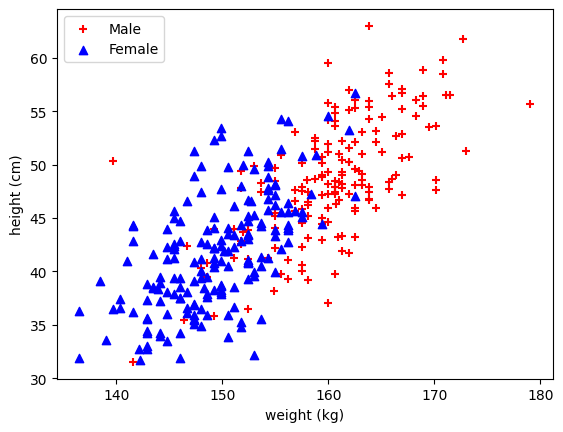

In [ ]:
male_height = np.ma.masked_where(howell_adults["male"] == 0, howell_adults["height"])
female_height = np.ma.masked_where(howell_adults["male"] == 1, howell_adults["height"])
weight = howell_adults["weight"]
plt.scatter(male_height, weight, c="red", marker="+")
plt.scatter(female_height, weight, c="blue", marker="^")
plt.xlabel("weight (kg)")
plt.ylabel("height (cm)")
plt.legend(["Male", "Female"])
plt.show()

Reflection 2:
What patterns or anomalies do you see?\
    Women tend to be shorter and smaller in weight, while men are taller and heavier in this dataset. I'm now thinking about how short these people are. If we're measuring in CM, How is someone 170kg and 55cm tall? That's so crazy.\
Do any features stand out?\
    Mostly about the height and weight thing. Are we sure these aren't in inches?

### Train/Test Data Split

In [ ]:
train_set, test_set = train_test_split(howell_adults, test_size=0.2, random_state=123)

print("Train size: ", len(train_set), "Test size: ", len(test_set))
print("Adult counts", howell_adults["male"].value_counts())
print("Train counts", train_set["male"].value_counts())
print("Test counts", test_set["male"].value_counts())

Train size:  276 Test size:  70
Adult counts male
0    182
1    164
Name: count, dtype: int64
Train counts male
0    141
1    135
Name: count, dtype: int64
Test counts male
0    41
1    29
Name: count, dtype: int64


### Stratified Test/Train Data Split

In [ ]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(howell_adults, howell_adults["male"]):
    train_set = howell_adults.iloc[train_indices]
    test_set = howell_adults.iloc[test_indices]

print("Train size: ", len(train_set), "Test size: ", len(test_set))
print("Adult counts", howell_adults["male"].value_counts())
print("Train counts", train_set["male"].value_counts())
print("Test counts", test_set["male"].value_counts())

Train size:  276 Test size:  70
Adult counts male
0    182
1    164
Name: count, dtype: int64
Train counts male
0    145
1    131
Name: count, dtype: int64
Test counts male
0    37
1    33
Name: count, dtype: int64
